rsi

create a function without using pandas ta and add all the helper function within the single function :

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


                 Close        High         Low        Open     Volume
Date                                                                 
2024-05-24  179.240005  180.080002  173.729996  174.839996   65479700
2024-05-28  176.750000  178.250000  173.160004  176.399994   59736600
2024-05-29  176.190002  178.149994  173.929993  174.190002   54782600
2024-05-30  178.789993  182.669998  175.380005  178.580002   77784800
2024-05-31  178.080002  180.320007  173.820007  178.500000   67314600
...                ...         ...         ...         ...        ...
2025-05-19  342.089996  343.000000  333.369995  336.299988   88869900
2025-05-20  343.820007  354.989990  341.630005  347.869995  131715500
2025-05-21  334.619995  347.350006  332.200012  344.429993  102354800
2025-05-22  341.040009  347.269989  331.390015  331.899994   97113400
2025-05-23  339.339996  343.179993  333.209991  337.920013   84439200

[250 rows x 5 columns]
                 Close        High         Low        Open     Vol

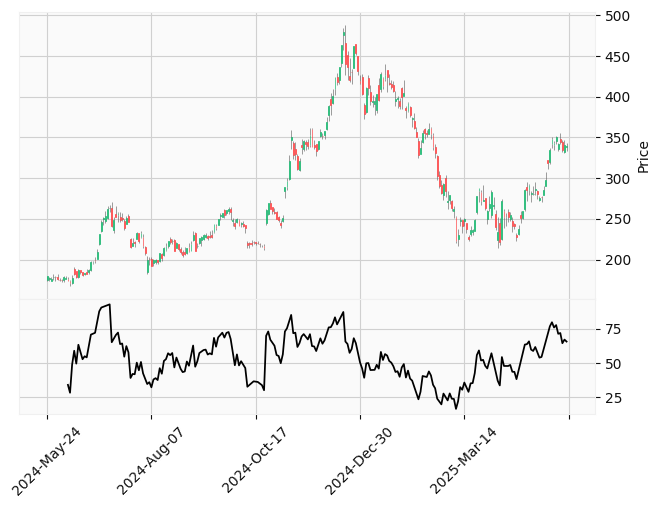

In [1]:
import yfinance as yf
import pandas as pd

stock_name = 'TSLA'
df = yf.download(stock_name,multi_level_index=False,period='12mo')
print(df)

import mplfinance as mpf
import pandas_ta as ta
import talib as ta1
df['rsi2']=ta.rsi(df['Close'],10)
df['rsi']=ta1.RSI(df['Close'],10)
print(df)

a=mpf.make_addplot(df['rsi'],color='black',panel=1)
mpf.plot(df,type='candle',style='yahoo',addplot=[a])

In [ ]:
def rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs):
    """Custom RSI Indicator (no pandas_ta or talib, all logic inline)"""

    # Inline helper: Wilder's RMA
    def rma(series, length):
        return series.ewm(alpha=1/length, adjust=False).mean()

    # Inline helper: validate close series
    def verify_series(series, length):
        if not isinstance(series, pd.Series):
            raise ValueError("Input 'close' must be a pandas Series.")
        if len(series) < length:
            raise ValueError("Input 'close' series is shorter than the required length.")
        return series

    # Inline helper: get drift
    def get_drift(drift):
        return int(drift) if drift and drift > 0 else 1

    # Inline helper: get offset
    def get_offset(offset):
        return int(offset) if offset else 0

    # Validate inputs
    length = int(length) if length and length > 0 else 14
    scalar = float(scalar) if scalar else 100.0
    close = verify_series(close, length)
    drift = get_drift(drift)
    offset = get_offset(offset)

    # Calculate RSI
    delta = close.diff(drift)
    positive = delta.copy()
    negative = delta.copy()

    positive[positive < 0] = 0
    negative[negative > 0] = 0

    avg_gain = rma(positive, length)
    avg_loss = rma(negative.abs(), length)

    rs = avg_gain / avg_loss
    rsi = scalar - (scalar / (1 + rs))

    # Offset
    if offset != 0:
        rsi = rsi.shift(offset)

    # Fill handling
    if "fillna" in kwargs:
        rsi.fillna(kwargs["fillna"], inplace=True)
    if "fill_method" in kwargs:
        rsi.fillna(method=kwargs["fill_method"], inplace=True)

    # Set name and category
    rsi.name = f"RSI_{length}"
    rsi.category = "momentum"

    return rsi

df['rsi3']=rsi(df['Close'],10)
df

,Close,High,Low,Open,Volume,rsi2,rsi,rsi3
Date,,,,,,,,
2024-05-24,179.240005,180.080002,173.729996,174.839996,65479700,NaN,NaN,NaN
2024-05-28,176.750000,178.250000,173.160004,176.399994,59736600,NaN,NaN,0.000000
2024-05-29,176.190002,178.149994,173.929993,174.190002,54782600,NaN,NaN,0.000000
2024-05-30,178.789993,182.669998,175.380005,178.580002,77784800,NaN,NaN,11.171689
2024-05-31,178.080002,180.320007,173.820007,178.500000,67314600,NaN,NaN,10.805421
...,...,...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,71.287025,71.287025,71.287025
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,71.849110,71.849110,71.849110
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,64.399965,64.399965,64.399965


adx

[*********************100%***********************]  1 of 1 completed


                 Close        High         Low        Open     Volume
Date                                                                 
2024-05-24  179.240005  180.080002  173.729996  174.839996   65479700
2024-05-28  176.750000  178.250000  173.160004  176.399994   59736600
2024-05-29  176.190002  178.149994  173.929993  174.190002   54782600
2024-05-30  178.789993  182.669998  175.380005  178.580002   77784800
2024-05-31  178.080002  180.320007  173.820007  178.500000   67314600
...                ...         ...         ...         ...        ...
2025-05-19  342.089996  343.000000  333.369995  336.299988   88869900
2025-05-20  343.820007  354.989990  341.630005  347.869995  131715500
2025-05-21  334.619995  347.350006  332.200012  344.429993  102354800
2025-05-22  341.040009  347.269989  331.390015  331.899994   97113400
2025-05-23  339.339996  343.179993  333.209991  337.920013   84439200

[250 rows x 5 columns]


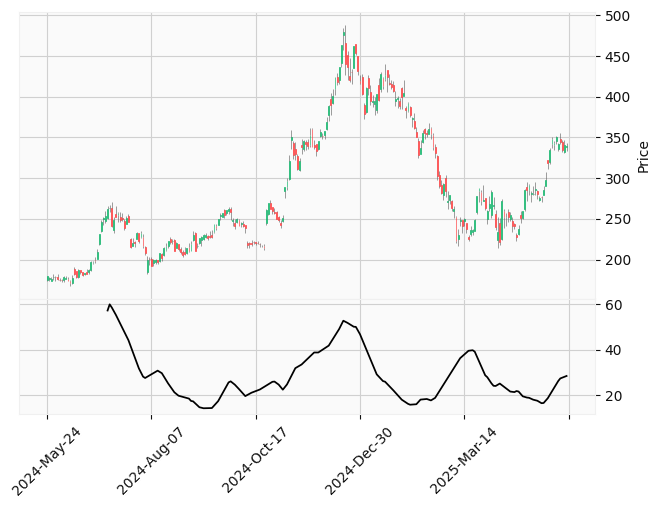

,Close,High,Low,Open,Volume,adx1,adx2
Date,,,,,,,
2024-05-24,179.240005,180.080002,173.729996,174.839996,65479700,NaN,NaN
2024-05-28,176.750000,178.250000,173.160004,176.399994,59736600,NaN,NaN
2024-05-29,176.190002,178.149994,173.929993,174.190002,54782600,NaN,NaN
2024-05-30,178.789993,182.669998,175.380005,178.580002,77784800,NaN,NaN
2024-05-31,178.080002,180.320007,173.820007,178.500000,67314600,NaN,NaN
...,...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,26.252205,26.252202
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,27.405342,27.405339
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,27.828637,27.828635


In [15]:
import yfinance as yf
import pandas as pd

stock_name = 'TSLA'
df = yf.download(stock_name,multi_level_index=False,period='12mo')
print(df)

import mplfinance as mpf
import pandas_ta as ta
import talib as ta1
l=15
a=ta.adx(df['High'],df['Low'],df['Close'],l)
b=ta1.ADX(df['High'],df['Low'],df['Close'],l)

df['adx1']=a[f'ADX_{l}']
df['adx2']=b
# print(df)

a=mpf.make_addplot(df['adx1'],color='black',panel=1)
mpf.plot(df,type='candle',style='yahoo',addplot=[a])
df

In [20]:

def adx(high, low, close, length=None, lensig=None, scalar=None, mamode=None, drift=None, offset=None, **kwargs):
    """Custom ADX Indicator (no pandas_ta or talib, all logic inline)"""

    # === Inline Helpers ===
    def verify_series(series, min_len):
        if not isinstance(series, pd.Series):
            raise ValueError("Input must be a pandas Series.")
        if len(series) < min_len:
            raise ValueError(f"Series must be at least {min_len} periods long.")
        return series

    def get_drift(drift):
        return int(drift) if drift and drift > 0 else 1

    def get_offset(offset):
        return int(offset) if offset else 0

    def zero(x):
        return x if x > 0 else 0

    def rma(series, length):
        return series.ewm(alpha=1/length, adjust=False).mean()

    def sma(series, length):
        return series.rolling(window=length, min_periods=length).mean()

    def ma(mode, series, length):
        if mode == "sma":
            return sma(series, length)
        else:  # Default to RMA
            return rma(series, length)

    def atr(high, low, close, length):
        tr1 = high - low
        tr2 = (high - close.shift(1)).abs()
        tr3 = (low - close.shift(1)).abs()
        tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
        return rma(tr, length)

    # === Validate Inputs ===
    length = int(length) if length and length > 0 else 14
    lensig = int(lensig) if lensig and lensig > 0 else length
    scalar = float(scalar) if scalar else 100.0
    mamode = mamode if isinstance(mamode, str) else "rma"
    drift = get_drift(drift)
    offset = get_offset(offset)

    high = verify_series(high, length)
    low = verify_series(low, length)
    close = verify_series(close, length)

    # === Calculate ATR ===
    atr_ = atr(high=high, low=low, close=close, length=length)

    # === Calculate directional movement ===
    up = high - high.shift(drift)
    dn = low.shift(drift) - low

    pos = ((up > dn) & (up > 0)) * up
    neg = ((dn > up) & (dn > 0)) * dn

    pos = pos.apply(zero)
    neg = neg.apply(zero)

    k = scalar / atr_
    dmp = k * ma(mamode, pos, length)
    dmn = k * ma(mamode, neg, length)

    dx = scalar * (dmp - dmn).abs() / (dmp + dmn)
    adx = ma(mamode, dx, length=lensig)

    # === Apply Offset ===
    if offset != 0:
        dmp = dmp.shift(offset)
        dmn = dmn.shift(offset)
        adx = adx.shift(offset)

    # === Handle missing data ===
    if "fillna" in kwargs:
        adx.fillna(kwargs["fillna"], inplace=True)
        dmp.fillna(kwargs["fillna"], inplace=True)
        dmn.fillna(kwargs["fillna"], inplace=True)
    if "fill_method" in kwargs:
        adx.fillna(method=kwargs["fill_method"], inplace=True)
        dmp.fillna(method=kwargs["fill_method"], inplace=True)
        dmn.fillna(method=kwargs["fill_method"], inplace=True)

    # === Set names and return as DataFrame ===
    adx.name = f"ADX_{lensig}"
    dmp.name = f"DMP_{length}"
    dmn.name = f"DMN_{length}"

    adx.category = dmp.category = dmn.category = "trend"

    adxdf = pd.DataFrame({adx.name: adx, dmp.name: dmp, dmn.name: dmn})
    adxdf.name = f"ADX_{lensig}"
    adxdf.category = "trend"

    return adxdf

d=adx(df['High'],df['Low'],df['Close'],l)
df['adx3']=d[f'ADX_{l}']
df

,Close,High,Low,Open,Volume,adx1,adx2,adx3
Date,,,,,,,,
2024-05-24,179.240005,180.080002,173.729996,174.839996,65479700,NaN,NaN,NaN
2024-05-28,176.750000,178.250000,173.160004,176.399994,59736600,NaN,NaN,100.000000
2024-05-29,176.190002,178.149994,173.929993,174.190002,54782600,NaN,NaN,100.000000
2024-05-30,178.789993,182.669998,175.380005,178.580002,77784800,NaN,NaN,98.680293
2024-05-31,178.080002,180.320007,173.820007,178.500000,67314600,NaN,NaN,94.446171
...,...,...,...,...,...,...,...,...
2025-05-19,342.089996,343.000000,333.369995,336.299988,88869900,26.252205,26.252202,26.252209
2025-05-20,343.820007,354.989990,341.630005,347.869995,131715500,27.405342,27.405339,27.405346
2025-05-21,334.619995,347.350006,332.200012,344.429993,102354800,27.828637,27.828635,27.828641


bollinger band

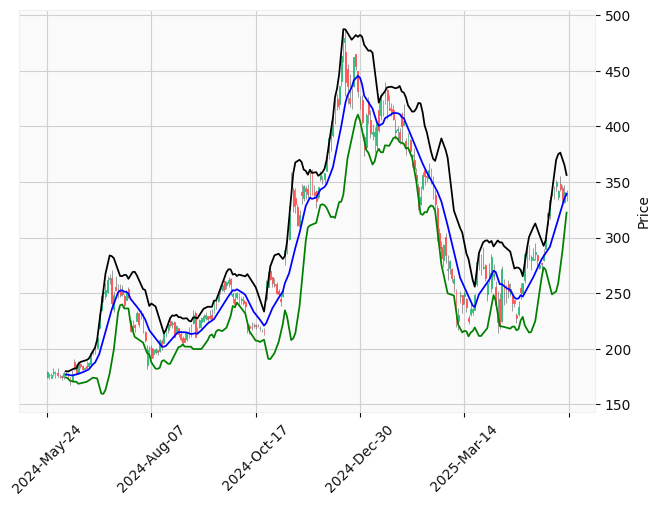

In [ ]:
l=10
bb=ta.bbands(df['Close'],l)
df=pd.concat([df, bb], axis=1)
df
bb1=ta1.BBANDS(df['Close'],l)
u,m,l=bb1

a=mpf.make_addplot(u,color='black')
b=mpf.make_addplot(m,color='blue')
c=mpf.make_addplot(l,color='green')
mpf.plot(df,type='candle',style='yahoo',addplot=[a,b,c])


supertrend

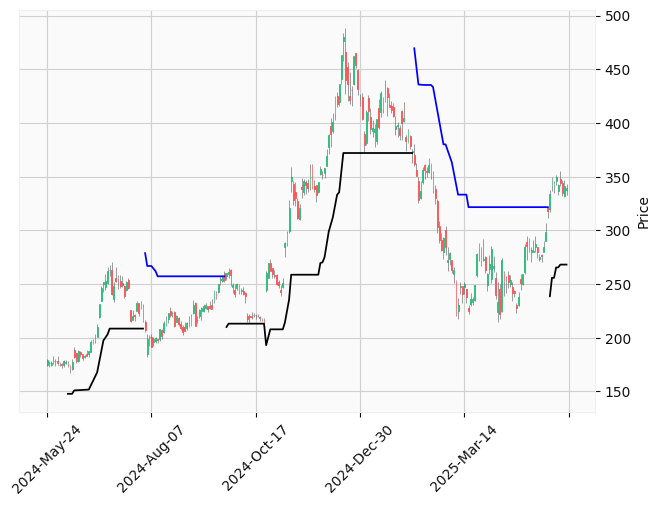

,SUPERT_10_5.0,SUPERTd_10_5.0,SUPERTl_10_5.0,SUPERTs_10_5.0
Date,,,,
2024-05-24,0.000000,1,NaN,NaN
2024-05-28,NaN,1,NaN,NaN
2024-05-29,NaN,1,NaN,NaN
2024-05-30,NaN,1,NaN,NaN
2024-05-31,NaN,1,NaN,NaN
...,...,...,...,...
2025-05-19,265.463970,1,265.463970,NaN
2025-05-20,268.131571,1,268.131571,NaN
2025-05-21,268.131571,1,268.131571,NaN


In [39]:
l=10
m=5
s=ta.supertrend(df['High'],df['Low'],df['Close'],l,m)
s.tail(20)



a=mpf.make_addplot(s[f'SUPERTl_{l}_{m}.0'],color='black')
b=mpf.make_addplot(s[f'SUPERTs_{l}_{m}.0'],color='blue')

mpf.plot(df,type='candle',style='yahoo',addplot=[a,b])
s

In [38]:
import pandas as pd
import numpy as np

def supertrend(high, low, close, length=None, multiplier=None, offset=None, **kwargs):
    """Custom Supertrend Indicator (all helpers included inline, no external TA libs)"""

    # === Inline Helpers ===
    def verify_series(series, min_len):
        if not isinstance(series, pd.Series):
            raise ValueError("Input must be a pandas Series.")
        if len(series) < min_len:
            raise ValueError(f"Series must be at least {min_len} periods long.")
        return series

    def get_offset(offset):
        return int(offset) if offset else 0

    def hl2(high, low):
        return (high + low) / 2

    def rma(series, length):
        return series.ewm(alpha=1/length, adjust=False).mean()

    def atr(high, low, close, length):
        tr1 = high - low
        tr2 = (high - close.shift(1)).abs()
        tr3 = (low - close.shift(1)).abs()
        tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)
        return rma(tr, length)

    # === Validate Inputs ===
    length = int(length) if length and length > 0 else 7
    multiplier = float(multiplier) if multiplier and multiplier > 0 else 3.0
    offset = get_offset(offset)

    high = verify_series(high, length)
    low = verify_series(low, length)
    close = verify_series(close, length)

    m = len(close)
    dir_ = [1] * m
    trend = [np.nan] * m
    long = [np.nan] * m
    short = [np.nan] * m

    hl2_ = hl2(high, low)
    matr = multiplier * atr(high, low, close, length)
    upperband = hl2_ + matr
    lowerband = hl2_ - matr

    for i in range(1, m):
        if close.iloc[i] > upperband.iloc[i - 1]:
            dir_[i] = 1
        elif close.iloc[i] < lowerband.iloc[i - 1]:
            dir_[i] = -1
        else:
            dir_[i] = dir_[i - 1]
            if dir_[i] > 0 and lowerband.iloc[i] < lowerband.iloc[i - 1]:
                lowerband.iloc[i] = lowerband.iloc[i - 1]
            if dir_[i] < 0 and upperband.iloc[i] > upperband.iloc[i - 1]:
                upperband.iloc[i] = upperband.iloc[i - 1]

        if dir_[i] > 0:
            trend[i] = lowerband.iloc[i]
            long[i] = lowerband.iloc[i]
        else:
            trend[i] = upperband.iloc[i]
            short[i] = upperband.iloc[i]

    # === Output DataFrame ===
    _props = f"_{length}_{multiplier}"
    df = pd.DataFrame({
        f"SUPERT{_props}": trend,
        f"SUPERTd{_props}": dir_,
        f"SUPERTl{_props}": long,
        f"SUPERTs{_props}": short,
    }, index=close.index)

    df.name = f"SUPERT{_props}"
    df.category = "overlap"

    # Apply offset
    if offset != 0:
        df = df.shift(offset)

    # Fill handling
    if "fillna" in kwargs:
        df.fillna(kwargs["fillna"], inplace=True)
    if "fill_method" in kwargs:
        df.fillna(method=kwargs["fill_method"], inplace=True)

    return df


s1=supertrend(df['High'],df['Low'],df['Close'],l,m)
s1

,SUPERT_10_5.0,SUPERTd_10_5.0,SUPERTl_10_5.0,SUPERTs_10_5.0
Date,,,,
2024-05-24,NaN,1,NaN,NaN
2024-05-28,145.154968,1,145.154968,NaN
2024-05-29,145.476467,1,145.476467,NaN
2024-05-30,147.872831,1,147.872831,NaN
2024-05-31,147.872831,1,147.872831,NaN
...,...,...,...,...
2025-05-19,265.463970,1,265.463970,NaN
2025-05-20,268.131571,1,268.131571,NaN
2025-05-21,268.131571,1,268.131571,NaN


keltner channel

In [ ]:
l=10
ta.kc(df['High'],df['Low'],df['Close'],l)

,KCLe_10_2,KCBe_10_2,KCUe_10_2
Date,,,
2024-05-24,NaN,NaN,NaN
2024-05-28,NaN,NaN,NaN
2024-05-29,NaN,NaN,NaN
2024-05-30,NaN,NaN,NaN
2024-05-31,NaN,NaN,NaN
...,...,...,...
2025-05-19,292.508385,323.334301,354.160216
2025-05-20,296.979594,327.058975,357.138355
2025-05-21,298.314215,328.433706,358.553196


In [42]:


def kc(high, low, close, length=None, scalar=None, mamode=None, offset=None, **kwargs):
    """Keltner Channels (KC) - All helper functions embedded, no pandas-ta dependency."""

    # === Inline Helper Functions ===
    def verify_series(series, min_len):
        if not isinstance(series, pd.Series):
            raise ValueError("Input must be a pandas Series.")
        if len(series) < min_len:
            raise ValueError(f"Series must be at least {min_len} elements long.")
        return series

    def get_offset(offset):
        return int(offset) if offset else 0

    def true_range(high, low, close):
        prev_close = close.shift(1)
        tr1 = high - low
        tr2 = (high - prev_close).abs()
        tr3 = (low - prev_close).abs()
        return pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    def high_low_range(high, low):
        return high - low

    def ma(mode, series, length):
        if mode.lower() == "ema":
            return series.ewm(span=length, adjust=False).mean()
        elif mode.lower() == "sma":
            return series.rolling(window=length, min_periods=1).mean()
        else:
            raise ValueError(f"Unsupported ma mode: {mode}")

    # === Validate Arguments ===
    length = int(length) if length and length > 0 else 20
    scalar = float(scalar) if scalar and scalar > 0 else 2
    mamode = mamode if isinstance(mamode, str) else "ema"
    offset = get_offset(offset)

    high = verify_series(high, length)
    low = verify_series(low, length)
    close = verify_series(close, length)

    # === Calculate Channels ===
    use_tr = kwargs.pop("tr", True)

    range_ = true_range(high, low, close) if use_tr else high_low_range(high, low)
    basis = ma(mamode, close, length)
    band = ma(mamode, range_, length)

    upper = basis + scalar * band
    lower = basis - scalar * band

    # === Apply Offset ===
    if offset != 0:
        lower = lower.shift(offset)
        basis = basis.shift(offset)
        upper = upper.shift(offset)

    # === Handle Fills ===
    if "fillna" in kwargs:
        lower.fillna(kwargs["fillna"], inplace=True)
        basis.fillna(kwargs["fillna"], inplace=True)
        upper.fillna(kwargs["fillna"], inplace=True)
    if "fill_method" in kwargs:
        lower.fillna(method=kwargs["fill_method"], inplace=True)
        basis.fillna(method=kwargs["fill_method"], inplace=True)
        upper.fillna(method=kwargs["fill_method"], inplace=True)

    # === Format Output ===
    _props = f"{mamode.lower()[0]}_{length}_{scalar}"
    lower.name = f"KCL{_props}"
    basis.name = f"KCB{_props}"
    upper.name = f"KCU{_props}"

    kc_df = pd.DataFrame({lower.name: lower, basis.name: basis, upper.name: upper})
    kc_df.name = f"KC{_props}"
    kc_df.category = "volatility"

    return kc_df


kc(df['High'],df['Low'],df['Close'],l)

,KCLe_10_2,KCBe_10_2,KCUe_10_2
Date,,,
2024-05-24,166.539993,179.240005,191.940018
2024-05-28,166.185448,178.787277,191.389106
2024-05-29,166.469912,178.315045,190.160179
2024-05-30,166.059020,178.401400,190.743779
2024-05-31,165.881017,178.342964,190.804910
...,...,...,...
2025-05-19,292.508385,323.334301,354.160216
2025-05-20,296.979594,327.058975,357.138355
2025-05-21,298.314215,328.433706,358.553196


psar

            PSARl_10.0_0.2  PSARs_10.0_0.2  PSARaf_10.0_0.2  PSARr_10.0_0.2
Date                                                                       
2024-05-24             NaN             NaN             10.0               0
2024-05-28             NaN      343.179993              0.2               0
2024-05-29             NaN      309.175995              0.2               0
2024-05-30             NaN      281.972797              0.2               0
2024-05-31             NaN      260.210238              0.2               0
...                    ...             ...              ...             ...
2025-05-19      333.369995             NaN             10.0               1
2025-05-20             NaN      354.989990             10.0               1
2025-05-21      332.200012             NaN             10.0               1
2025-05-22             NaN      347.350006             10.0               1
2025-05-23      331.390015             NaN             10.0               1

[250 rows x

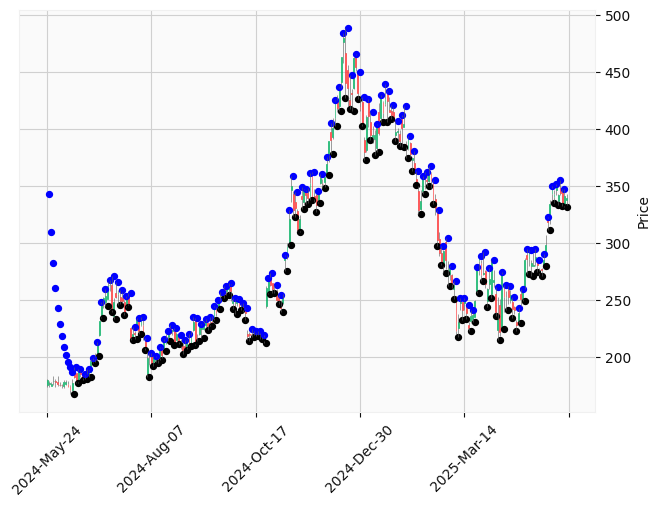

In [47]:
l=10
d=ta.psar(df['High'],df['Low'],df['Close'],l)
print(d)
a=mpf.make_addplot(d['PSARl_10.0_0.2'],color='black',type='scatter')
b=mpf.make_addplot(d[f'PSARs_10.0_0.2'],color='blue',type='scatter')

mpf.plot(df,type='candle',style='yahoo',addplot=[a,b])